# Rozwiązanie równania wibracji akustycznych warstw materiału
Rozwiązanie równania przy pomocy bibliotek numpy, scipy oraz matplotlib. Rysowanie wykresu otrzymanej funkcji.

## Rówanie wibracji akustycznych warstw materiału

$$ \left\{
\begin{array}{ll}
      \frac{-d^2u(x)}{dx^2}-u=sinx \\
      u(0)=0\\
      \frac{du(2)}{dx}-u(2)=0\\
\end{array} 
\right.  $$ 
    
$$[0,2]\ni x \rightarrow u(x) \in R $$

## Rozwiązanie równiania

Po przekształceniach otrzymujemy równanie postaci
$$
u(2)v(2) -  \int_{0}^{2} u'(x)v'(x) - u(x)v(x) \,dx = - \int_{0}^{2} v(x)sin(x) \,dx 
$$

## Kod - rozwiązanie

In [3]:
from numpy.linalg import inv
from functools import partial
from math import sin

from matplotlib import pyplot as plt
import scipy.integrate as integrate
from scipy.misc import derivative
import numpy as np
from time import time

Stworzenie funkcji B i L na podstawie obliczeń zrobioncyh na zajęciach. Przyjmuje ona u i v, przy czym u[0] i v[0] to są funkcje u(x) oraz v(x), u[1] i v[1] są pochodnymi u i v, u[2], v[2] to są lewe końce, u[3], v[3] prawe końce przedziałów na któych u i v są zdefiniowane. Aby nie wykonywać niepotrzebnych obliczeń całkujemy tylko po przedziale w którym zdefiniowane są i u, i v. Za a i b przyjmujemy maksymalny przedział dla których całkę możemy policzyć.

In [4]:
def B(u, v):
    a1, b1, a2, b2 = u[2], u[3], v[2], v[3]
    if b1 >= a2 >= a1:
        a = a2
        b = b1
    elif b2 >= a1 >= a2:
        a = a1
        b = b2
    else:
        return v[0](2) * u[0](2)
    if a == b:
        return v[0](2) * u[0](2)
    return v[0](2) * u[0](2) - integrate.quad(lambda x: u[1](x) * v[1](x) - v[0](x) * u[0](x), a, b)[0]


def L(v):
    a = v[2]
    b = v[3]
    return -integrate.quad(lambda x: sin(x) * v[0](x), a, b)[0]

Storzenie funkcji e_i, tworzących "piramidki", na przedziale [0,2], ich pochodnych oraz przedziałów dla których są zdefiniowane. 

In [5]:
def e_i(i, n):
    h = 2 / n
    d1 = 1 - i
    d2 = 1 + i

    a = max(0, h * (i-1))
    b = min(h * (i+1), 2)

    def e(x):
        if a <= x <= h * i:
            return 1 / h * x + d1
        elif h * i < x < b:
            return -1 / h * x + d2
        return 0

    def de(x):
        if a <= x <= h * i:
            return 1 / h
        elif h * i < x < b:
            return -1 / h
        return 0

    return e, de, a, b


def get_e(n):
    e = []
    for i in range(n+1):
        e.append(e_i(i, n))

    return e


 Stworzenie macierzy potrzebnych do rozwiązania układu równań

In [6]:
def arrays(B, L, e):
    arr_B = np.array([[B(u, v) for u in e] for v in e])
    arr_L = np.array([L(v) for v in e])
    return arr_B, arr_L


Rozwiązanie układu równań 

In [7]:
def dotArrays(arr_B, arr_L):
    return inv(arr_B).dot(arr_L)

Ostateczne rozwiązanie, wykorzystanie uprzednio stworznych funkcji. Utworzenie kombinacji liniowej i zwrócenie ostatecznego wyniku jako funkcji

In [8]:
def u(arr_u, e, x):
    res = 0
    for i in range(len(e)):
        res += e[i][0](x) * arr_u[i]
    return res


def solve(n):
    e = get_e(n)
    arr_B, arr_L = arrays(B, L, e)
    arr_u = dotArrays(arr_B, arr_L)

    return lambda x: u(arr_u, e, x)


Narysowanie wykresu w zależności od n

In [9]:
def draw_plot(n):
    x_values = np.linspace(0, 2, 100)

    start = time()
    y_values = list(map(solve(n), x_values))
    end = time()

    # czas liczenia
    print(end - start)

    plt.plot(x_values, y_values)
    plt.show()


## Przypisanie n przykładowej wartości (można dowolnie zmieniać)

In [10]:
n = 1000

## Rysowanie wykresu funkcji oraz wyświetlenie czasu obliczania równania

1.5179965496063232


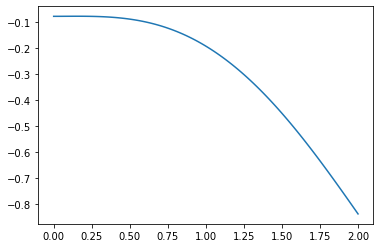

In [11]:
draw_plot(n)